# Creating a Convnet

Now it is time to create our first convnet! This example is for the purpose of getting familiar with CNN architectures, we will talk about how to improves its performance later.

This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/cnn
Dataset

The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the CIFAR Image Dataset. It contains 60,000 32x32 color images with 6000 images of each class.

The labels in this dataset are the following:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.

In [ ]:
# Step 1: Initialiing

# %tensorflow_version 2.x  # this line is not required unless you are in a notebook

import matplotlib.pyplot as plt

import tensorflow as tf

# Use aliases to avoid import resolution issues
datasets = tf.keras.datasets
layers = tf.keras.layers
models = tf.keras.models

In [2]:
# Step 2: Load & prepare data

#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = [
    # Class names, respectively
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

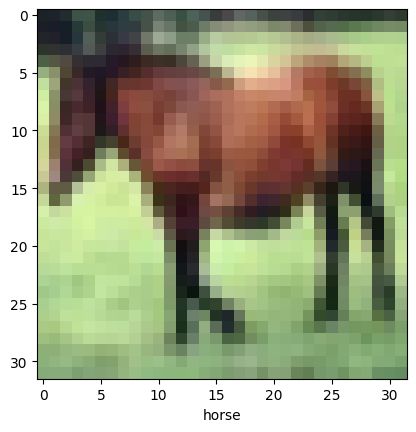

In [3]:
# Step 3: Debug

# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX])  # ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture

A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the Convolutional Base.

In [5]:
# Step 4: Create a model

model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

print("model.summary", model.summary())  # Let's have a look at our model so far

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

model.summary None


**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

After looking at the summary you should notice that the depth of our image increases but the spacial dimensions reduce drastically.

## Adding Dense Layers

So far, we have just completed the convolutional base. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.

In [6]:
# Step 5: Adding layers

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

print("model.summary", model.summary())  # Show updated model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

model.summary None


We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, follwed by the final output layer of 10 neurons (one for each class).

## Training

Now we will train and compile the model using the recommended hyper paramaters from tensorflow.

_Note: This will take much longer than previous models!_

In [7]:
# Step 6: Training

model.compile(
    optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
)

do_epochs = 2
history = model.fit(train_images, train_labels, epochs=do_epochs, validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.3551 - loss: 1.7385 - val_accuracy: 0.5347 - val_loss: 1.3163
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5853 - loss: 1.1647 - val_accuracy: 0.6284 - val_loss: 1.0366


## Evaluating the Model

We can determine how well the model performed by looking at it's performance on the test data set.

In [8]:
# Step 7: Evaluating the Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("test_acc:", test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.6284 - loss: 1.0366
test_acc: 0.6284000277519226


You should be getting an accuracy of about 70%. This isn't bad for a simple model like this, but we'll dive into some better approaches for computer vision below.

## Working with Small Datasets

In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images.

### Data Augmentation

To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.

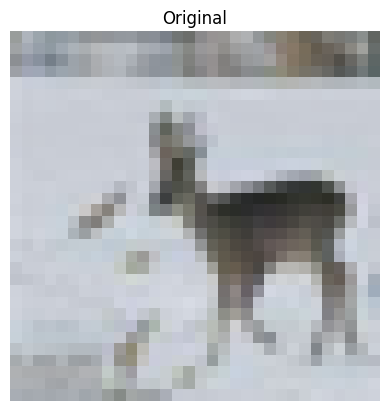

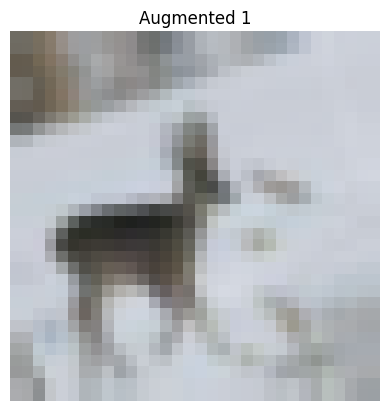

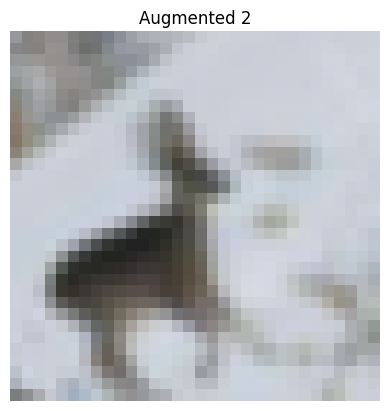

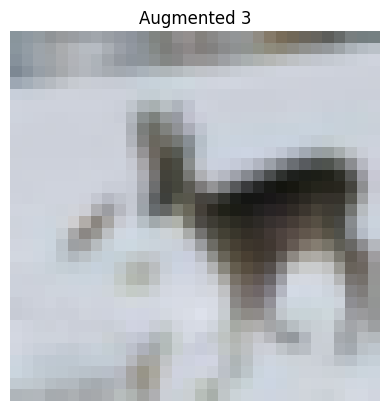

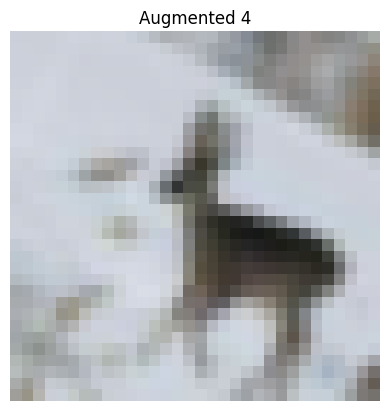

In [9]:
# Step 8: Data augmentation

# Original deprecated code (for reference):
# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')
# test_img = train_images[20]
# img = image.img_to_array(test_img)
# img = img.reshape((1,) + img.shape)
# for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
#     plt.figure(i)
#     plot = plt.imshow(image.img_to_array(batch[0]))
#     i += 1
#     if i > 4:
#         break

# Create data augmentation pipeline using modern tf.keras.layers
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomContrast(0.2),
    ]
)

# Pick an image to transform and show augmented versions
test_img = train_images[20]
test_img_batch = tf.expand_dims(test_img, 0)  # Add batch dimension

# Show original and augmented images
for i in range(5):
    plt.figure(i)
    if i == 0:
        plt.imshow(test_img)
        plt.title("Original")
    else:
        augmented = data_augmentation(test_img_batch, training=True)
        plt.imshow(tf.squeeze(augmented, 0))
        plt.title(f"Augmented {i}")
    plt.axis("off")

plt.show()